In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [56]:
df = pd.read_excel('C:/Users/sudet/Downloads/210/final_dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             798 non-null    object 
 1   Time             798 non-null    object 
 2   Amount           798 non-null    float64
 3   Balance          798 non-null    float64
 4   Description      798 non-null    object 
 5   Category         798 non-null    object 
 6   Emotional State  679 non-null    object 
dtypes: float64(2), object(5)
memory usage: 43.8+ KB


In [57]:
# Convert the Date and Time columns to datetime format if not already done
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'])

# Group by Date and aggregate the Amount and Balance
daily_spending = df.sort_values(by='DateTime').groupby('Date').agg({
    'Amount': 'sum',
    'Balance': 'last'
}).reset_index()

# Convert the Date column to datetime format for sorting
daily_spending['Date'] = pd.to_datetime(daily_spending['Date'], format='%d.%m.%Y')

# Sort by Date starting from the earliest
daily_spending = daily_spending.sort_values(by='Date')

# Display the daily spending
print(daily_spending)

          Date   Amount   Balance
59  2022-10-04  -229.00   4146.00
72  2022-10-05  -450.99   3695.01
98  2022-10-07   -28.70   6166.31
110 2022-10-08   -50.95   6115.36
125 2022-10-09   -15.60   6099.76
..         ...      ...       ...
279 2024-10-21   -70.00  22238.54
289 2024-10-22  -435.00  21803.54
300 2024-10-23  -295.20  21508.34
317 2024-10-24 -1964.13  19544.21
326 2024-10-25 -2319.94  17224.27

[390 rows x 3 columns]


C:\Users\sudet\AppData\Local\Temp\ipykernel_13896\1556106525.py:2: UserWarning:

Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [58]:
daily_spending['Amount'] = daily_spending['Amount'].abs()
print(daily_spending)

          Date   Amount   Balance
59  2022-10-04   229.00   4146.00
72  2022-10-05   450.99   3695.01
98  2022-10-07    28.70   6166.31
110 2022-10-08    50.95   6115.36
125 2022-10-09    15.60   6099.76
..         ...      ...       ...
279 2024-10-21    70.00  22238.54
289 2024-10-22   435.00  21803.54
300 2024-10-23   295.20  21508.34
317 2024-10-24  1964.13  19544.21
326 2024-10-25  2319.94  17224.27

[390 rows x 3 columns]


In [59]:
daily_spending.head()

,Date,Amount,Balance
59,2022-10-04,229.00,4146.00
72,2022-10-05,450.99,3695.01
98,2022-10-07,28.70,6166.31
110,2022-10-08,50.95,6115.36
125,2022-10-09,15.60,6099.76


In [60]:
import plotly.express as px
import plotly.io as pio

# Base scatter plot
fig = px.scatter(daily_spending, x='Date', y='Amount', title='Daily Spending Over Time')

# Update marker properties
fig.update_traces(
    marker=dict(size=8, color='green', opacity=0.6)  # Smaller size, no black outline
)

# Highlight the highest and lowest spending dates
max_spending = daily_spending[daily_spending['Amount'] == daily_spending['Amount'].max()]
min_spending = daily_spending[daily_spending['Amount'] == daily_spending['Amount'].min()]

fig.add_trace(
    px.scatter(
        max_spending,
        x='Date',
        y='Amount',
        color_discrete_sequence=['red'],  # Highlight with red for highest
    ).data[0]
)

fig.add_trace(
    px.scatter(
        min_spending,
        x='Date',
        y='Amount',
        color_discrete_sequence=['blue'],  # Highlight with blue for lowest
    ).data[0]
)

# Annotate the highest and lowest spending points
fig.add_annotation(
    x=max_spending['Date'].iloc[0],
    y=max_spending['Amount'].iloc[0],
    text='Highest Spending',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='red',
    font=dict(size=12, color='red'),
    bgcolor='white',
    ax=0,
    ay=-40,
)

# Add reference line for the average spending amount
average_spending = daily_spending['Amount'].mean()
fig.add_shape(
    type='line',
    x0=daily_spending['Date'].min(),
    x1=daily_spending['Date'].max(),
    y0=average_spending,
    y1=average_spending,
    line=dict(color='red', dash='dash'),
    xref='x',
    yref='y'
)

fig.add_annotation(
    x=min_spending['Date'].iloc[0],
    y=min_spending['Amount'].iloc[0],
    text='Lowest Spending',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='blue',
    font=dict(size=12, color='blue'),
    bgcolor='white',
    ax=0,
    ay=40,
)

# Improve layout
fig.update_layout(
    title={
        'text': 'Daily Spending Over Time',
        'x': 0.5,  # Center align the title
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    },
    xaxis_title='Date',
    yaxis_title='Amount',
    template='plotly_white',
    margin=dict(t=80, b=60, l=60, r=40),
    hovermode='x unified',  # Unified hover for clarity
)

fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='daily_spending_graph.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)


In [47]:
# Ensure 'Date' is a datetime type
daily_spending['Date'] = pd.to_datetime(daily_spending['Date'])

# Set 'Date' as the index for easier resampling
daily_spending.set_index('Date', inplace=True)

In [51]:
# Calculate the average weekly spending
monthly_spending = daily_spending['Amount'].resample('M').mean().reset_index()

# Rename columns for clarity
monthly_spending.columns = ['Date', 'Average Monthly Spending']

print(monthly_spending)

         Date  Average Monthly Spending
0  2022-10-31                109.603529
1  2022-11-30                666.017333
2  2022-12-31                297.350000
3  2023-01-31               1138.960714
4  2023-02-28               1007.510000
5  2023-03-31                864.996111
6  2023-04-30                511.000556
7  2023-05-31               1147.578889
8  2023-06-30                977.496250
9  2023-07-31               1454.191000
10 2023-08-31                859.113750
11 2023-09-30                590.138750
12 2023-10-31                656.800417
13 2023-11-30                760.890500
14 2023-12-31               1115.020833
15 2024-01-31               1585.488000
16 2024-02-29               1450.180833
17 2024-03-31               1043.820500
18 2024-04-30               1269.391053
19 2024-05-31                463.404815
20 2024-06-30               1377.528462
21 2024-07-31               2864.043000
22 2024-08-31                294.980000
23 2024-09-30               3511.405455


In [52]:
# Calculate the average weekly spending
weekly_spending = daily_spending['Amount'].resample('W').mean().reset_index()

# Rename columns for clarity
weekly_spending.columns = ['Date', 'Average Weekly Spending']

print(weekly_spending)

          Date  Average Weekly Spending
0   2022-10-09               155.048000
1   2022-10-16               122.890000
2   2022-10-23                85.975000
3   2022-10-30                32.000000
4   2022-11-06               903.640000
..         ...                      ...
103 2024-09-29               805.545000
104 2024-10-06              1861.086667
105 2024-10-13              3238.666667
106 2024-10-20               878.738333
107 2024-10-27              1016.854000

[108 rows x 2 columns]


In [62]:
import numpy as np
import plotly.graph_objects as go

# Define a function to detect anomalies using Z-scores
def detect_anomalies(data, threshold=2):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = (data - mean) / std
    anomalies = np.where(np.abs(z_scores) > threshold)
    return anomalies[0]

# Detect anomalies for weekly and monthly spending
weekly_anomalies = detect_anomalies(weekly_spending['Average Weekly Spending'])
monthly_anomalies = detect_anomalies(monthly_spending['Average Monthly Spending'])

# Create the figure for trend comparison
fig = go.Figure()

# Add Weekly Spending trend line
fig.add_trace(
    go.Scatter(
        x=weekly_spending['Date'],
        y=weekly_spending['Average Weekly Spending'],
        mode='lines',
        line=dict(color='lightpink', width=2, dash='solid'),
        name='Weekly Spending'
    )
)

# Highlight anomalies in Weekly Spending
fig.add_trace(
    go.Scatter(
        x=weekly_spending.iloc[weekly_anomalies]['Date'],
        y=weekly_spending.iloc[weekly_anomalies]['Average Weekly Spending'],
        mode='markers',
        marker=dict(size=10, color='red', symbol='circle'),
        name='Weekly Anomalies'
    )
)

# Add Monthly Spending trend line
fig.add_trace(
    go.Scatter(
        x=monthly_spending['Date'],
        y=monthly_spending['Average Monthly Spending'],
        mode='lines',
        line=dict(color='palevioletred', width=2, dash='dot'),
        name='Monthly Spending'
    )
)

# Highlight anomalies in Monthly Spending
fig.add_trace(
    go.Scatter(
        x=monthly_spending.iloc[monthly_anomalies]['Date'],
        y=monthly_spending.iloc[monthly_anomalies]['Average Monthly Spending'],
        mode='markers',
        marker=dict(size=10, color='blue', symbol='circle'),
        name='Monthly Anomalies'
    )
)

# Update layout to improve aesthetics
fig.update_layout(
    title={
        'text': 'Weekly vs Monthly Spending Trends with Anomalies',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'family': 'Arial, sans-serif'}
    },
    xaxis=dict(
        title='Date',
        tickformat='%b %Y',
        showgrid=True,
        gridcolor='lightgray',
        tickangle=45
    ),
    yaxis=dict(
        title='Spending',
        zeroline=True,
        zerolinecolor='lightgray',
        showgrid=True,
        gridcolor='lightgray'
    ),
    template='plotly_white',
    height=600,  # Adjusted height
    margin=dict(t=80, b=50, l=50, r=50),
    hovermode='x unified'  # Unified hover for easy comparison
)

# Show the plot
fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='weekly_monthly_spending.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)


In [63]:
import plotly.express as px

# Convert Amount to absolute values
df['Amount'] = df['Amount'].abs()

# Create the scatter plot with log-scaled y-axis
fig = px.scatter(
    df,
    x='Balance',
    y='Amount',
    title='Balance vs Amount (Log Scaled)',
    labels={'Balance': 'Account Balance', 'Amount': 'Transaction Amount'},
    hover_data=['Category', 'Date']  # Include additional details in the hover
)

# Update marker properties for better visualization
fig.update_traces(marker=dict(size=8, color='blue', opacity=0.7))

# Log scale for the y-axis
fig.update_yaxes(type='log', title_text='Transaction Amount (Log Scale)', showgrid=True, gridcolor='lightgray')
fig.update_xaxes(title_text='Account Balance', showgrid=True, gridcolor='lightgray')

# Enhance the layout
fig.update_layout(
    title={
        'text': 'Balance vs Transaction Amount (Log Scaled)',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    },
    template='plotly_white',
    height=600,  # Set height for better spacing
    margin=dict(t=80, b=50, l=50, r=50),
    hovermode='closest'  # Focus hover on nearest point
)

# Add annotations for key points (optional)
highest_amount = df.loc[df['Amount'].idxmax()]
fig.add_annotation(
    x=highest_amount['Balance'],
    y=highest_amount['Amount'],
    text=f'Highest Amount: ${highest_amount["Amount"]:.2f}',
    showarrow=True,
    arrowhead=2,
    arrowcolor='red',
    font=dict(size=12, color='red'),
    ax=0,
    ay=-40
)

fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='balance_vs_transaction.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)

In [64]:
# Extract the hour from the DateTime column
df['Hour'] = df['DateTime'].dt.hour

# Group by hour and calculate the average spending
average_spending_per_hour = df.groupby('Hour')['Amount'].mean()

# Take the absolute values of the Amount column
average_spending_per_hour = average_spending_per_hour.abs()

print(average_spending_per_hour)

Hour
0      277.547333
1      624.146000
2      101.246667
6      587.815000
7     6800.000000
8      119.166667
9     1429.652143
10     301.735435
11     422.063500
12     331.620735
13     747.265532
14     444.011852
15     873.602500
16     379.716786
17     665.702687
18     458.815077
19     381.449796
20     382.572821
21     446.211471
22     730.854167
23     237.872500
Name: Amount, dtype: float64


In [65]:
# Extract the hour part from the Time column
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)

# Count the number of transactions per hour
transactions_per_hour = df.groupby('Hour').size()
print(transactions_per_hour)

Hour
0     15
1     10
2      3
6      2
7      1
8     12
9     28
10    92
11    60
12    68
13    47
14    54
15    48
16    56
17    67
18    65
19    49
20    39
21    34
22    24
23    24
dtype: int64


In [66]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extract the hour and calculate average spending per hour
df['Hour'] = df['DateTime'].dt.hour  # Adjust column name if necessary
average_spending_per_hour = df.groupby('Hour')['Amount'].mean().abs()

# Extract the hour and count transactions per hour
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)  # Adjust column name if necessary
transactions_per_hour = df.groupby('Hour').size()

# Create a subplot figure with two columns
fig = make_subplots(
    rows=1, cols=2,
    shared_yaxes=False,  # Each chart has its own y-axis
    subplot_titles=['Average Spending Per Hour', 'Number of Transactions Per Hour']
)

# Plot 1: Average Spending Per Hour
fig.add_trace(
    go.Bar(
        x=average_spending_per_hour.index,
        y=average_spending_per_hour,
        marker=dict(color='darkturquoise', line=dict(color='black', width=1)),
        name='Average Spending',
        text=average_spending_per_hour,
        texttemplate='%{text:.2f}',
        textposition='outside',
        hovertemplate='<b>Hour:</b> %{x}<br><b>Average Spending:</b> ₺%{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)

# Plot 2: Number of Transactions Per Hour
fig.add_trace(
    go.Bar(
        x=transactions_per_hour.index,
        y=transactions_per_hour,
        marker=dict(color='mediumseagreen', line=dict(color='black', width=1)),
        name='Transactions',
        text=transactions_per_hour,
        texttemplate='%{text}',
        textposition='outside',
        hovertemplate='<b>Hour:</b> %{x}<br><b>Transactions:</b> %{y}<extra></extra>'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title={
        'text': 'Average Spending and Transactions Per Hour',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    },
    xaxis=dict(
        title='Hour',
        tickmode='linear',
        dtick=1,
        showgrid=True,
        gridcolor='lightgray'
    ),
    xaxis2=dict(
        title='Hour',
        tickmode='linear',
        dtick=1,
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title='Average Spending (₺)',
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis2=dict(
        title='Number of Transactions',
        showgrid=True,
        gridcolor='lightgray'
    ),
    height=500,
    width=1000,
    template='plotly_white',
    margin=dict(t=80, b=50, l=50, r=50)
)

# Show the combined plot
fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='spending_hour.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)


In [67]:
import plotly.express as px

# Group by Category and sum the Amount
category_spending = df.groupby('Category')['Amount'].sum().reset_index()

# Take the absolute values of the Amount column
category_spending['Amount'] = category_spending['Amount'].abs()

# Plot the pie chart
fig = px.pie(
    category_spending,
    values='Amount',
    names='Category',
    title='Spending by Category',
    color_discrete_sequence=px.colors.qualitative.Set3  # Use a qualitative color scheme
)

# Customize the traces
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',  # Show percentage and category label
    pull=[0.1 if amount == category_spending['Amount'].max() else 0 for amount in category_spending['Amount']],  # Emphasize largest segment
    marker=dict(line=dict(color='white', width=2))  # Add white borders for better distinction
)

# Enhance the layout
fig.update_layout(
    title={
        'text': 'Spending by Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    },
    legend_title='Category',
    legend=dict(
        orientation='v',  # Vertical legend
        yanchor='top',
        y=0.9,
        xanchor='left',
        x=0.1
    ),
    height=600,  # Adjust height for better readability
    margin=dict(t=80, b=50, l=50, r=50)
)

# Show the improved pie chart
fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='spending_category.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)


In [71]:
# Ensure 'DateTime' is in datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract the month and year from 'DateTime' for grouping
df['YearMonth'] = df['DateTime'].dt.to_period('M')

# Group by 'YearMonth' and 'Category', then sum the 'Amount'
monthly_spending_by_category = df.groupby(['YearMonth', 'Category'])['Amount'].sum().reset_index()

# Convert 'YearMonth' back to datetime for plotting
monthly_spending_by_category['YearMonth'] = monthly_spending_by_category['YearMonth'].dt.to_timestamp()

# Display the result
print(monthly_spending_by_category)

     YearMonth        Category   Amount
0   2022-10-01       education   665.00
1   2022-10-01            food   454.90
2   2022-10-01          market   271.08
3   2022-10-01           other    35.81
4   2022-10-01        skincare   317.72
..         ...             ...      ...
209 2024-10-01           other  3020.00
210 2024-10-01        skincare   389.00
211 2024-10-01    subscription    33.06
212 2024-10-01       thrifting  3256.63
213 2024-10-01  transportation   150.00

[214 rows x 3 columns]


In [72]:
import plotly.graph_objects as go
import plotly.express as px

# Take the absolute values of the Amount column
monthly_spending_by_category['Amount'] = monthly_spending_by_category['Amount'].abs()

# Define a color sequence
color_sequence = px.colors.qualitative.Plotly

# Create a base figure
fig = go.Figure()

# Add all category traces to the figure
categories = monthly_spending_by_category['Category'].unique()
for i, category in enumerate(categories):
    category_data = monthly_spending_by_category[monthly_spending_by_category['Category'] == category]
    fig.add_trace(
        go.Scatter(
            x=category_data['YearMonth'],
            y=category_data['Amount'],
            mode='lines',
            name=category,
            line=dict(color=color_sequence[i % len(color_sequence)], width=2),
            visible=(i == 0),  # Only the first category is visible initially
            hovertemplate=f'<b>{category}</b><br>Date: {{x}}<br>Amount: ₺{{y:.2f}}<extra></extra>'
        )
    )

# Add interactive filtering (dropdown menu)
dropdown_buttons = [
    {
        "label": "All Categories",
        "method": "update",
        "args": [{"visible": [True] * len(categories)}, {"title": "Monthly Spending Trends by Category"}]
    }
]

# Add individual buttons for each category
for i, category in enumerate(categories):
    visibility = [False] * len(categories)
    visibility[i] = True
    dropdown_buttons.append(
        {
            "label": category,
            "method": "update",
            "args": [{"visible": visibility}, {"title": f"Monthly Spending Trends for {category}"}]
        }
    )

# Update layout with repositioned dropdown menu
fig.update_layout(
    updatemenus=[
        {
            "buttons": dropdown_buttons,
            "direction": "down",
            "showactive": True,
            "x": 0.5,
            "xanchor": "center",
            "y": 1.05,  # Position below the title
            "yanchor": "top"
        }
    ],
    title={
        "text": "Monthly Spending Trends by Category",
        "x": 0.5,
        "y": 0.9,
        "xanchor": "center",
        "yanchor": "top",
        "font": {"size": 20}
    },
    xaxis=dict(
        title="Date",
        showgrid=True,
        gridcolor="lightgray",
        tickformat="%b %Y",  # Display month and year
    ),
    yaxis=dict(
        title="Amount (₺)",
        showgrid=True,
        gridcolor="lightgray"
    ),
    legend=dict(
        title="Category",
        orientation="h",  # Horizontal legend
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    ),
    template="plotly_white",
    height=650,
    margin=dict(t=120, b=50, l=50, r=50)
)

# Show the interactive plot
fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='monthly_spending_trends.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)


In [73]:

df = df.dropna()
df

,Date,Time,Amount,Balance,Description,Category,Emotional State,DateTime,Hour,YearMonth
0,25.10.2024,23:42,257.99,17224.27,046 DOLAP.COM XXXX 6703,thrifting,strong positive,2024-10-25 23:42:00,23,2024-10
1,25.10.2024,19:47,1939.95,17482.26,046 IYZICO /ZARA.COM XXXX 6703 3D,clothing,strong positive,2024-10-25 19:47:00,19,2024-10
2,25.10.2024,15:29,70.00,19422.21,062 PIZZA RESTAURANTLARI XXXX 6703,food,strong positive,2024-10-25 15:29:00,15,2024-10
3,25.10.2024,12:34,32.00,19492.21,046 7036 İSTANBUL SABANC TEMASSIZ XXXX 6703,market,strong positive,2024-10-25 12:34:00,12,2024-10
4,25.10.2024,12:28,20.00,19524.21,7777/MBL-HAV.ALİ OSMAN TERLEMEZ,other,strong positive,2024-10-25 12:28:00,12,2024-10
...,...,...,...,...,...,...,...,...,...,...
697,03.01.2023,01:22,179.00,1885.00,111 Bİİ BURGER TEMASSIZ XXXX 6703,food,positive,2023-01-03 01:22:00,1,2023-01
698,02.01.2023,14:53,65.00,1920.00,046 TTMOBIL TL YUKLEME XXXX 6703 3D,transportation,positive,2023-01-02 14:53:00,14,2023-01
699,02.01.2023,12:18,15.00,1985.00,7777/MBL-HAV.ZEYNEP DİLA KUYUCU-SADAKA,other,positive,2023-01-02 12:18:00,12,2023-01
700,02.01.2023,12:17,2500.00,2000.00,7777/MBL-VİRMAN 1045-0085930,investment,positive,2023-01-02 12:17:00,12,2023-01


In [81]:
import plotly.express as px

# Group by Emotional State and Category, and count occurrences
heatmap_data = df.groupby(['Emotional State', 'Category']).size().reset_index(name='Count')

# Calculate proportions within each category
heatmap_data['Proportion'] = heatmap_data.groupby('Category')['Count'].transform(lambda x: x / x.sum())

# Create a heatmap for proportions
fig = px.density_heatmap(
    heatmap_data,
    x='Category',
    y='Emotional State',
    z='Proportion',
    color_continuous_scale=[
        "#ffe4e1", "#ffb6c1", "#ff69b4", "#ff1493", "#c71585"
    ],  # Custom pinkish color scale
    title='Heatmap: Proportions of Emotional States Within Categories',
    labels={'Category': 'Transaction Category', 'Emotional State': 'Emotional State', 'Proportion': 'Proportion'}
)

# Enhance layout
fig.update_layout(
    xaxis=dict(
        title='Transaction Category',
        tickangle=45,
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        title='Emotional State',
        showgrid=True,
        gridcolor='lightgray'
    ),
    title={
        'text': 'Heatmap: Proportions of Emotional States Within Categories',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'family': 'Arial'}
    },
    coloraxis_colorbar=dict(
        title='Proportion',
        ticks='outside',
        tickformat='.2%',  # Show proportions as percentages
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    template='plotly_white',
    height=600,
    margin=dict(t=80, b=100, l=50, r=50)
)

fig.update_layout(
    yaxis=dict(categoryorder='array', categoryarray=[
        'strong negative', 'negative', 'mildly negative', 'neutral', 
        'mildly positive', 'positive', 'strong positive'
    ]))

# Add annotations to show the values inside cells
fig.update_traces(
    texttemplate='%{z:.2%}',  # Format proportions as percentages
    textfont=dict(size=12, color='black'),
    hovertemplate='<b>Category:</b> %{x}<br><b>Emotional State:</b> %{y}<br><b>Proportion:</b> %{z:.2%}<extra></extra>'
)

# Show the heatmap
fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='emotional_state_proportion.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)

In [83]:
# Group by Emotional State and count the occurrences
emotional_state_counts = df['Emotional State'].value_counts().reset_index()
emotional_state_counts.columns = ['Emotional State', 'Count']

# Plot the emotional state counts using Plotly
fig = px.bar(emotional_state_counts, x='Emotional State', y='Count', title='Emotional State Distribution')
fig.update_layout(
    xaxis=dict(categoryorder='array', categoryarray=[
        'strong negative', 'negative', 'mildly negative', 'neutral', 
        'mildly positive', 'positive', 'strong positive'
    ]))
fig.update_layout(xaxis_title='Emotional State', yaxis_title='Count')
fig.update_traces(marker=dict(color='mediumpurple'))
fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='emotional_state_countplot.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)

In [84]:
# Filter out rows with missing Emotional State
df_filtered = df.dropna(subset=['Emotional State'])

# Define the order of emotional states
emotional_state_order = [
    'strong positive', 'positive', 'mildly positive', 'neutral',
    'mildly negative', 'negative', 'strong negative'
]

# Plot the emotional state over time using Plotly
fig = px.line(df_filtered, x='DateTime', y='Emotional State', title='Emotional State Over Time',
              category_orders={'Emotional State': emotional_state_order})
fig.update_traces(line=dict(color='dodgerblue'))
fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='emotional_state_overtime.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)

In [87]:
# Define the order of emotional states
emotional_state_order = [
    'strong positive', 'positive', 'mildly positive', 'neutral',
    'mildly negative', 'negative', 'strong negative'
]

# Calculate the average spending by emotional state
average_spending_by_emotional_state = df.groupby('Emotional State')['Amount'].mean().reset_index()

# Take the absolute values of the Amount column
average_spending_by_emotional_state['Amount'] = average_spending_by_emotional_state['Amount'].abs()

# Plot the average spending by emotional state using Plotly
fig = px.bar(average_spending_by_emotional_state, x='Emotional State', y='Amount', title='Average Spending By Emotional State',
             category_orders={'Emotional State': emotional_state_order})
fig.update_layout(xaxis_title='Emotional State', yaxis_title='Average Spending')
fig.update_traces(marker=dict(color='darkblue'))
fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='avg_emotional spending.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)

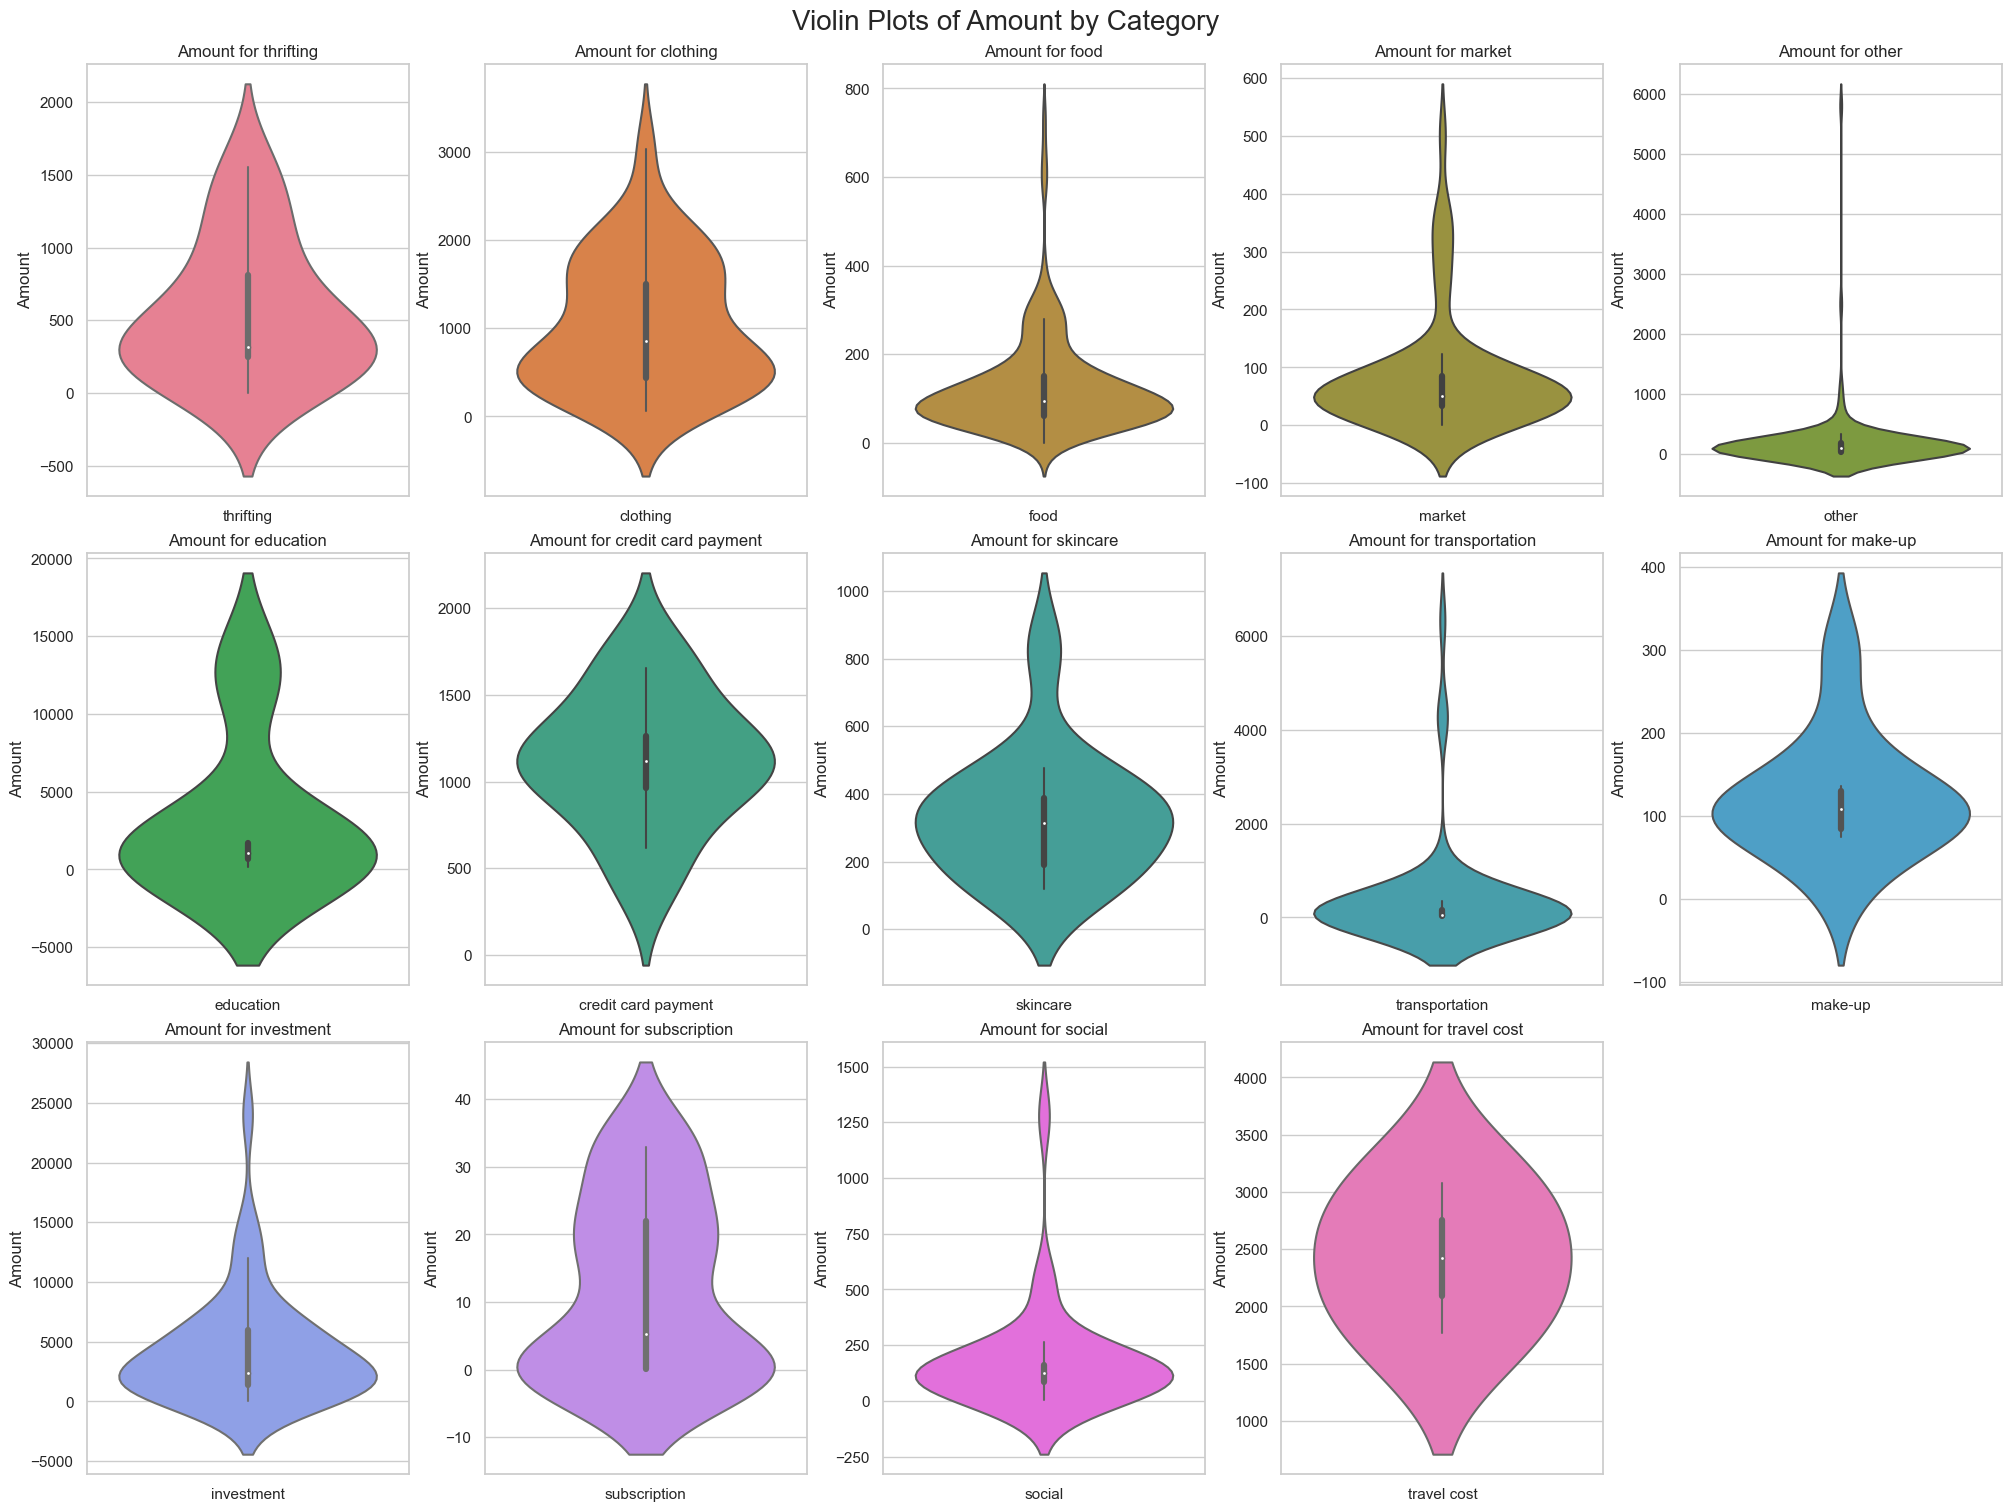

In [89]:
# Set the style and palette
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(df['Category'].unique()))

# Take the absolute values of the Amount column
df['Amount'] = df['Amount'].abs()

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 15), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each category and create a violin plot
for i, category in enumerate(df['Category'].unique()):
    sns.violinplot(ax=axes[i], x='Category', y='Amount', data=df[df['Category'] == category], palette=[palette[i]])
    axes[i].set_title(f'Amount for {category}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Amount')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Violin Plots of Amount by Category', fontsize=20)
plt.show()

In [90]:
df = pd.read_excel('C:/Users/sudet/Downloads/210/final_dataset.xlsx')
df.head()

,Date,Time,Amount,Balance,Description,Category,Emotional State
0,25.10.2024,23:42,-257.99,17224.27,046 DOLAP.COM XXXX 6703,thrifting,strong positive
1,25.10.2024,19:47,-1939.95,17482.26,046 IYZICO /ZARA.COM XXXX 6703 3D,clothing,strong positive
2,25.10.2024,15:29,-70.00,19422.21,062 PIZZA RESTAURANTLARI XXXX 6703,food,strong positive
3,25.10.2024,12:34,-32.00,19492.21,046 7036 İSTANBUL SABANC TEMASSIZ XXXX 6703,market,strong positive
4,25.10.2024,12:28,-20.00,19524.21,7777/MBL-HAV.ALİ OSMAN TERLEMEZ,other,strong positive


In [91]:
# Calculate the average, mode, and variance of the Amount for each Category
category_stats = df.groupby('Category')['Amount'].agg(['mean', 'var', lambda x: x.mode().iloc[0]]).reset_index()

# Rename the columns for clarity
category_stats.columns = ['Category', 'mean', 'var', 'mode']

# Display the result
print(category_stats)

               Category         mean           var      mode
0              clothing -1034.387353  5.394925e+05  -3029.00
1   credit card payment -1049.514286  1.695806e+05  -1735.76
2             education -2799.357500  2.182445e+07 -12750.00
3                  food  -123.364775  1.162550e+04    -50.00
4            investment -3115.083231  1.751832e+07  -2000.00
5               make-up  -131.723077  6.545753e+03   -299.98
6                market   -66.436667  7.492015e+03    -17.00
7                 other  -171.924751  2.343251e+05   -100.00
8              skincare  -332.516429  3.285199e+04   -827.86
9                social  -166.048529  5.211171e+04   -150.00
10         subscription   -11.470238  1.663694e+02    -32.99
11            thrifting  -555.360769  2.292813e+05  -1553.25
12       transportation  -426.954531  1.320434e+06    -30.00
13          travel cost -2423.333333  4.323083e+05  -3080.00


In [93]:
import plotly.express as px

# Analyze spending patterns within each category by emotional state
category_emotion_analysis = df.groupby(['Category', 'Emotional State'])['Amount'].sum().unstack(fill_value=0)

# Normalize spending within each category to see proportions by emotional state
category_emotion_normalized = category_emotion_analysis.div(category_emotion_analysis.sum(axis=1), axis=0)

# Reorder the columns
category_emotion_normalized = category_emotion_normalized[['strong positive', 'positive', 'mildly positive', 'neutral', 'mildly negative', 'negative', 'strong negative']]

# Visualize the proportions for each category
fig = px.bar(category_emotion_normalized.T, barmode='stack', title='Spending Patterns by Category and Emotional State')
fig.update_layout(yaxis_title='Proportion of Spending', xaxis_title='Emotional State')
fig.show()

category_emotion_normalized

# Save the figure to an HTML file
pio.write_html(fig, file='spending_category_emotion.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)

In [94]:
# Extract the hour part from the Time column
df['Hour'] = df['Time'].str.split(':').str[0]

# Group by Category and Hour, then sum the Amount
category_hour_analysis = df.groupby(['Category', 'Hour'])['Amount'].sum().unstack(fill_value=0)

# Normalize spending within each category to see proportions by hour
category_hour_normalized = category_hour_analysis.div(category_hour_analysis.sum(axis=1), axis=0)

# Visualize the proportions for each category
fig = px.bar(
    category_hour_normalized.T, 
    barmode='stack',
    title='Spending Patterns by Category and Hour',
    labels={'value': 'Proportion of Spending', 'index': 'Hour of the Day'},
    text_auto='.2f'
)
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Proportion of Spending',
    legend_title_text='Category'
)
fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='spending_category_hour.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)


In [102]:
import plotly.graph_objects as go

# Filter the category_hour_analysis dataframe for the clothing category
clothing_spending_per_hour = category_hour_analysis.loc['clothing']

# Calculate the number of transactions per hour for clothing
clothing_transactions_per_hour = df[df['Category'] == 'clothing'].groupby('Hour').size()

clothing_spending_per_hour = clothing_spending_per_hour.abs()
clothing_transactions_per_hour = clothing_transactions_per_hour.abs()
# Create a dual-axis bar and line plot
fig = go.Figure()

# Add clothing spending per hour as bars
fig.add_trace(
    go.Bar(
        x=clothing_spending_per_hour.index,
        y=clothing_spending_per_hour.values,
        name='Clothing Spending Per Hour',
        marker_color='blue',
        yaxis='y1',
    )
)

# Add number of transactions per hour as a line plot
fig.add_trace(
    go.Scatter(
        x=clothing_transactions_per_hour.index,
        y=clothing_transactions_per_hour.values,
        name='Number of Transactions Per Hour',
        mode='lines+markers',
        line=dict(color='orange', width=3),
        marker=dict(size=8),
        yaxis='y2',
    )
)

# Update layout for dual axes
fig.update_layout(
    title='Clothing Spending and Transactions Per Hour',
    xaxis=dict(title='Hour'),
    yaxis=dict(
        title='Spending',
        titlefont=dict(color='blue'),
        tickfont=dict(color='blue'),
        side='left',
    ),
    yaxis2=dict(
        title='Number of Transactions',
        titlefont=dict(color='orange'),
        tickfont=dict(color='orange'),
        overlaying='y',
        side='right',
    ),
    legend=dict(title='Metrics'),
    template='plotly_white',
    bargap=0.2,
)

fig.show()

# Save the figure to an HTML file
pio.write_html(fig, file='clothing.html', full_html=True)

# Or get the HTML string directly
graph_html = pio.to_html(fig, full_html=False)
